# Transformer
- Sequential model의 한계점과 이를 해결 하기 위해 등장한 Transformer
- LSTM처럼 재귀적인 구조가 없다
- Attention이라는 구조를 활용함. (Multi head attention)

> ### 참고 자료
- [Illustrated transformer (번역)](https://nlpinkorean.github.io/illustrated-transformer/)
- [Pytorch official Transformer tutorial](https://pytorch.org/tutorials/beginner/transformer_tutorial.html)

- 일반적인 RNN은 단어가 N개면 N번 재귀적으로 돌아야 한다.
- 하지만 트랜스포머의 인코더 부분을 보면 입력 단어가 3개든 100개든 N개의 단어를 한번에 처리하는 구조를 갖는다.


- 그리고 인코더와 디코더는 같은 구조를 갖지만, 네트워크 파라미터는 다르게 학습한다.

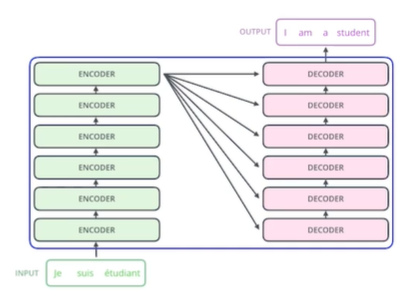

## 트랜스포머의 중요 특징
1. N개의 단어가 어떻게 인코더에서 한번에 처리가 될까?
2. 인코더와 디코더 사이에는 어떤 정보들이 있나?
3. 디코더가 어떻게 generation을 할 수 있는지?

---

## 인코더
- 인코더에 N개의 단어가 들어간다.
- Self-Attention이라는 구조와, Feed Forward NN이라는 구조 2단으로 거치는게 하나의 인코더다.
- 여기서 출력으로 나오는 값들이 그 다음 레이어의 인코더로 간다.

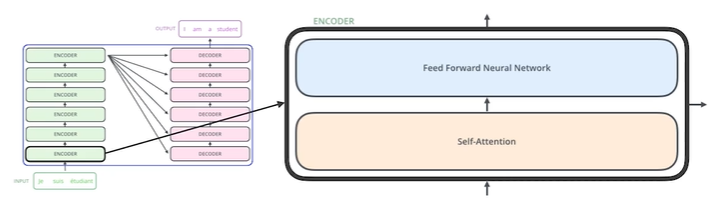

## ```Self-Attention```
- 트랜스포머의 핵심
- 3개의 단어가 주어지면(x vector), 3개의 vector를 찾는다.(z vector)
- ex) $x_1$ 이 $z_1$ 으로 넘어갈때, $x_1$ 뿐만 아니라 $x_2$, $x_3$ 모두 사용한다.
- N개의 단어를 만들때, 나머지 단어들을 모두 활용한다. (dependencies)
- 다른 단어들과의 관계성을 보게 된다.

- Self-Attention이 3가지 vector(query, key, value)를 만들게 된다.(3개의 뉴럴 네트워크가 있다고 보면 된다.)

#### ```Feed Forward```
- 셀프 어텐션에서 만들어진 $z_1$, $z_2$, $z_3$를 같은 네트워크를 통과해서 한번 변환해주는 것일 뿐임.
- dependencise가 없다.

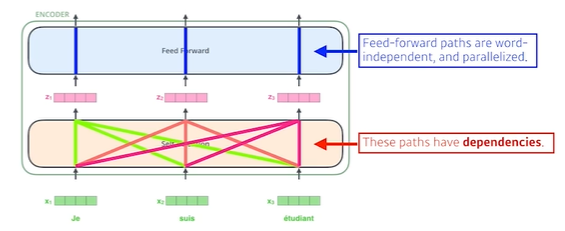

## ```Query, Key, Value```
- 하나의 입력이 주어졌을 때, 하나마다 3개의 벡터를 만들고 (query, key, value)
- 이 3개의 벡터를 통해서 $x_1$이라는 첫번째 단어를 새로운 벡터($z$)로 바꿔주게 된다.

- Query, Key, Value 를 찾아주는 MLP가 하나씩 있다고 생각하면 된다.
- 단어가(입력) N개면, N개의 Query, Key, Value가 생긴다.

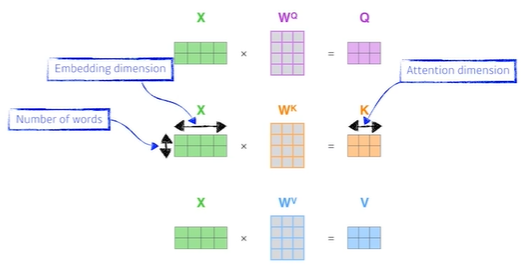

### 1. 먼저 **Score vector**를 만들게 된다.
- i번째 단어의 Score를 구하려면,
- 인코딩하고자 하는 i번째 단어의 Query 벡터와 
- 나머지 모든 N개 단어에 대한 Key 벡터를 
- 내적한다.
- 즉, i 번째 단어가 나머지 N개의 단어와 얼마나 유사도, 관계가 있는지를 알 수 있다.

### 2. Score 벡터를 Normalize한다. 
- (Key 벡터의 dimension에 의해 결정됨, $\sqrt{d_k}$)
- 그 다음 softmax를 취함.
- 자기 자신 포함한 모든 단어와의 interaction(관계)에 대한 값이 나온다.
- 이 값을 attention이라고 하자

### 3. 2번에서 구한 score 값을 Value 벡터와 Weighted Sum을 한다.
- weighted sum을 한 최종적인 값이
- i번째 단어의 인코딩된 벡터가 된다. (z vector)

#### 주의점
- Query vector와 Key vector는 항상 차원이 같다. (내적해야 되니까)
- Value vector는 나머지 벡터와 차원이 달라도 괜춘
- 대신, i번째 단어가 인코딩된 벡터인 z는 Value vector의 차원과 같다. (Multi head attention에서는 꼭 그럴필요는 없다.)


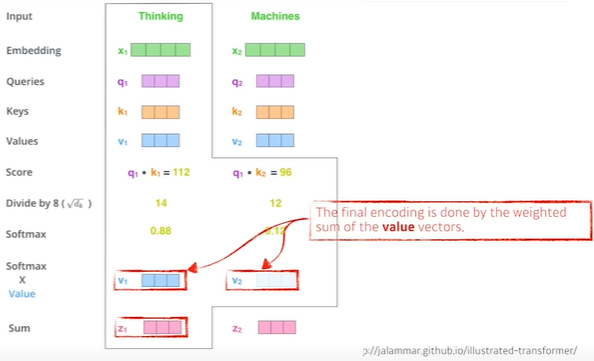

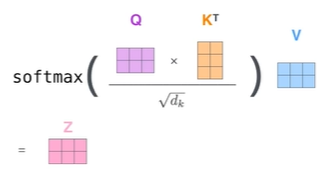

---
## Multi-headed attention
- 위에서 본 예제는 Single headed attention
- 하나의 입력에 대해서 Q,K,V를 하나만 만드는게 아니라 여러개 만드는 것임.
- N개의 attention을 반복함으로써, N개의 인코딩된 벡터(z)가 나오게 된다.

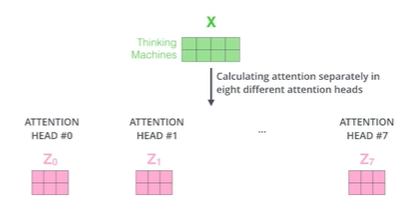

### 주의점
- 인코딩된 벡터(z)의 차원과 입력 벡터의 차원(x)이 같아야 한다.
- N개의 Output이 나오니까, 그것들을 원래의 차원으로 맞춰주는 linear map을 한다.


**코드 구현에서는 좀 다름!! Transformer 실습에서 더 자세히**

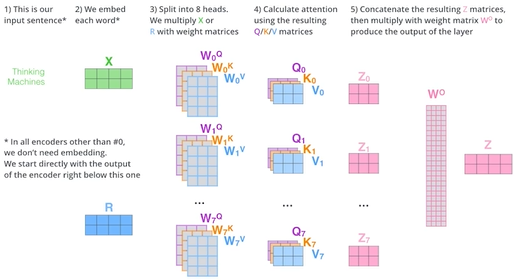

### Positional encoding 추가
- 입력에 특정 벡터값을 더해주는 bias라고 생각하면 된다.
- 트랜스포머 구조는 Sequential한 정보가 포함되어 있지 않는다. (order independent)
- 실제 문장에서는 순서가 중요하기 때문에 추가하게 된다.

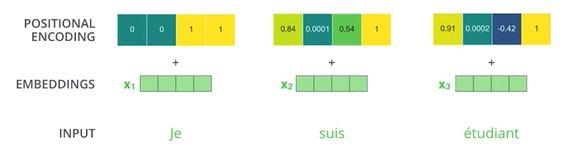

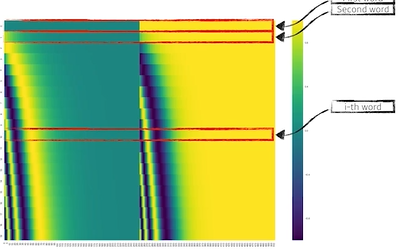

--- 
## 디코더
- 인코더는 주어진 단어를 표현하고, 디코더는 그것을 갖고 생성을 하는 개념이다.
- 여기서 인코더에서 디코더로 어떤 정보가 갈까?
- **Key와 Value를 보낸다.**


- 디코더에 들어가는 단어들로 만들어지는 Query vector와 인코더에서 보낸 Key vector와 Value vector를 가지고 최종값이 나오게 된다.
- 출력은 auto-regressive하게 단어 하나씩 뱉는다. (강의 28분 30초 gif 참고)

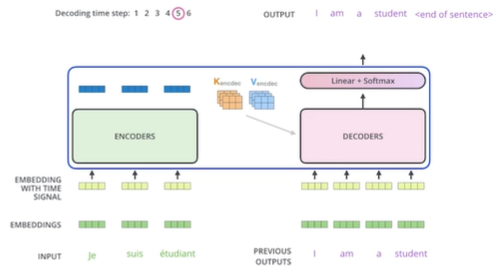